# Módulo 30 - K-Means

**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.


- `species`: Espécie do pinguim (Adelie, Chinstrap, Gentoo)
- `island`: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)
- `bill_length_mm`: Comprimento do bico em milímetros
- `bill_depth_mm`: Profundidade do bico em milímetros
- `flipper_length_mm`: Comprimento da barbatana em milímetros
- `body_mass_g`: Massa corporal em gramas
- `sex`: Sexo do pinguim (Male, Female)
- `year`: Ano em que a observação foi feita

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins')
df.columns = df.columns.str.upper()
df

,SPECIES,ISLAND,BILL_LENGTH_MM,BILL_DEPTH_MM,FLIPPER_LENGTH_MM,BODY_MASS_G,SEX
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [3]:
# VERIFICANDO TIPOS DE DADOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SPECIES            344 non-null    object 
 1   ISLAND             344 non-null    object 
 2   BILL_LENGTH_MM     342 non-null    float64
 3   BILL_DEPTH_MM      342 non-null    float64
 4   FLIPPER_LENGTH_MM  342 non-null    float64
 5   BODY_MASS_G        342 non-null    float64
 6   SEX                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# VERIFICANDO VALORES NULOS
df.isnull().mean() * 100

SPECIES              0.000000
ISLAND               0.000000
BILL_LENGTH_MM       0.581395
BILL_DEPTH_MM        0.581395
FLIPPER_LENGTH_MM    0.581395
BODY_MASS_G          0.581395
SEX                  3.197674
dtype: float64

In [5]:
# EXCLUINDO VALORES NULOS
df = df.dropna()

In [6]:
# EXCLUINDO COLUNAS NÃO NUMÉRICAS
df = df.drop(columns=['SPECIES', 'ISLAND', 'SEX'])

In [7]:
df.head()

,BILL_LENGTH_MM,BILL_DEPTH_MM,FLIPPER_LENGTH_MM,BODY_MASS_G
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


## 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

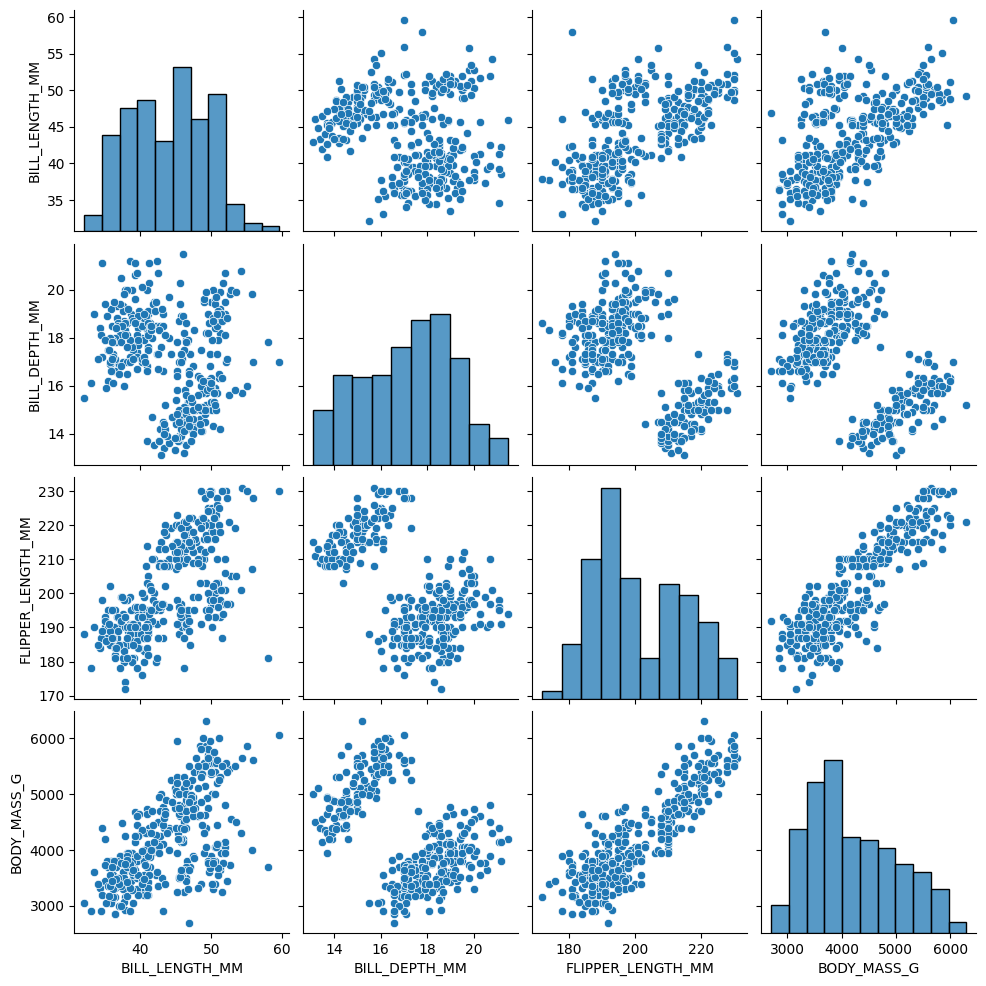

In [8]:
sns.pairplot(df)

Na imagem acima, podemos identificar alguns tipos de agrupamentos formado por conjuntos de dois e três.

Para os conjuntos formados por dois, temos como característica principal uma divisão clara entre os dois grupos. Em nosso gráfico, esses grupos estão expressos pelos gráficos com seguintes eixos:
- BILL_DEPTH_MM x FLIPPER_LENGTH_MM
- BILL_DEPTH_MM x BODY_MASS_G 

Agora, para os grupos formados por três integrantes, eles compartilham a características de estarem um pouco mais juntos ao serem comparados com o grupo formados por dois. Eles são expressos pelos seguintes gráficos:
- BILL_LENGTH_MM x FLIPPER_LENGTH_MM
- BILL_DEPTH_MM x BILL_LENGTH_MM 

**OBS.: Para evitar repetição, foram desconsiderados gráficos formados pelo mesmos eixos, mas invertidos, e.g. BODY_MASS_G x BILL_DEPTH_MM**


## 3 - Realize a padronização dos dados e visualize os dados.

In [9]:
df.head()

,BILL_LENGTH_MM,BILL_DEPTH_MM,FLIPPER_LENGTH_MM,BODY_MASS_G
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [10]:
colunas_padronizar = ['BILL_LENGTH_MM', 'BILL_DEPTH_MM', 'FLIPPER_LENGTH_MM', 'BODY_MASS_G']
scaler = StandardScaler()
df_padronizado = df.copy()
df_padronizado[colunas_padronizar] = scaler.fit_transform(df[colunas_padronizar])
df_padronizado.head(3)

,BILL_LENGTH_MM,BILL_DEPTH_MM,FLIPPER_LENGTH_MM,BODY_MASS_G
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361


Para a visualização de dados, vamos seguir os gráficos que se destacaram no exercício anterior:

- BILL_DEPTH_MM x FLIPPER_LENGTH_MM
- BILL_DEPTH_MM x BODY_MASS_G 
- BILL_LENGTH_MM x FLIPPER_LENGTH_MM
- BILL_DEPTH_MM x BILL_LENGTH_MM 

In [11]:
fig_1 = px.scatter(
    df_padronizado,
    x='BILL_DEPTH_MM',
    y='FLIPPER_LENGTH_MM',
    color_discrete_sequence=['blue']
)

fig_2 = px.scatter(
    df_padronizado,
    x='BILL_DEPTH_MM',
    y='BODY_MASS_G',
    color_discrete_sequence=['red']
)


fig_3 = px.scatter(
    df_padronizado,
    x='BILL_LENGTH_MM',
    y='FLIPPER_LENGTH_MM',
    color_discrete_sequence=['green']
)


fig_4 = px.scatter(
    df_padronizado,
    x='BILL_DEPTH_MM',
    y='BILL_LENGTH_MM',
    color_discrete_sequence=['violet']
)

In [12]:
fig_1.show()

In [13]:
fig_2.show()

In [14]:
fig_3.show()

In [15]:
fig_4.show()

Das quatro figuras analisadas, podemos inferir que as duas primeiras, dos gráfico `BILL_DEPTH_MM x FLIPPER_LENGTH_MM` e `BILL_DEPTH_MM x BODY_MASS_G`,  há uma divisão mais clara entre dois grupos. 

Em relação as duas últimas, até podemos tentar realizar agrupamentos, mas ainda não tem uma delimitação clara ao serem comparados com o agrupamento das duas primeiras imagens.

## 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [16]:
kmeans_penguin = KMeans (n_clusters=3, n_init=10000, random_state=0)
kmeans_penguin.fit(df_padronizado[colunas_padronizar])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10000
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [17]:
centroides_padronizados = kmeans_penguin.cluster_centers_ 
centroides_originais = scaler.inverse_transform(centroides_padronizados)
labels = kmeans_penguin.labels_
print("Centroides Originais:\n", centroides_originais)

Centroides Originais:
 [[  47.66235294   18.74823529  196.91764706 3898.23529412]
 [  47.56806723   14.99663866  217.23529412 5092.43697479]
 [  38.27674419   18.12170543  188.62790698 3593.79844961]]


In [18]:
df_kmeans = df.copy()
df_kmeans['CLUSTER'] = labels
df_kmeans.head()

,BILL_LENGTH_MM,BILL_DEPTH_MM,FLIPPER_LENGTH_MM,BODY_MASS_G,CLUSTER
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,2
2,40.3,18.0,195.0,3250.0,2
4,36.7,19.3,193.0,3450.0,2
5,39.3,20.6,190.0,3650.0,2


Retomando os dois gráficos de maior destaque do último exercício, temos o seguinte:

In [19]:
fig_5 = px.scatter(
    df_kmeans,
    x='BILL_DEPTH_MM',
    y='FLIPPER_LENGTH_MM',
    color='CLUSTER', 
    color_continuous_scale='viridis',
    opacity=0.7
)

fig_5.add_scatter(
    x=centroides_originais[:, 1],
    y=centroides_originais[:, 2],
    mode='markers',
    marker=dict(color='red', symbol='x', size=14),
    name='Centroides'
)

In [20]:
fig_6 = px.scatter(
    df_kmeans,
    x='BILL_DEPTH_MM',
    y='BODY_MASS_G',
    color='CLUSTER', 
    color_continuous_scale='viridis',
    opacity=0.7
)

fig_6.add_scatter(
    x=centroides_originais[:, 1],
    y=centroides_originais[:, 3], 
    mode='markers',
    marker=dict(color='red', symbol='x', size=14),
    name='Centroides'
)

A partir dos gráficos, podemos concluir que as espécies de CLUSTER '0' e '2' compartilham características em comum em `BILL_DEPTH_MM` e temos que a espécie '1' se diferencia dessas duas em `BODY_MASS_G` e `FLIPPER_LENGTH_MM`.

## 5 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:
- **Análise de rede:** Assim, como mencionado em aula, empresas de streaming e redes sociais utilizam algoritmos de clusterização para classificar diferentes públicos de sua plataforma para direcionamento mais preciso de recomendações. Aprofundamento: https://www.geeksforgeeks.org/machine-learning/netflix-movies-tv-show-clustering-using-unsupervised-ml/
- **Segmentação de imagens:** Podemos utilizar algoritmos de clusterização para análise de imagens, na medicina em análise de exames de imagem e na ciência, como o Hertzsprung–Russell. Aprofundamento https://en.wikipedia.org/wiki/Hertzsprung%e2%80%93Russell_diagram.
- **Detecção de fraude:** Algoritmos de clusterização auxiliam na detecção de anomalias identificando comportamentos suspeitos a partir de uma série de fatores, conseguindo classificar ao final em comportamento normal e anômolo. Aprofundamento: https://medium.com/@yadav.rjsh/fraud-detection-using-pyspark-k-means-clustering-48009e28e95d.

**FONTE PRINCIPAL:** https://developers.google.com/machine-learning/clustering/overview?hl=pt-br